In [2]:
# Import Packages & Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [3]:
# Import Dataset
from google.colab import files
uploaded = files.upload()

Saving ingredient.csv to ingredient.csv


In [4]:
# Read Dataset as Dataframe
df = pd.read_csv("ingredient.csv")

**Basic EDA**

Previewing dataframe to ensure the correct dataset was imported.

In [5]:
# Preview Dataframe
df.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


There are total of 9 attributes and 214 observations. All attributes are numerical and there is observation of null values in the dataset.

In [6]:
# Determine Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


To double check the are there any missing values in the dataset. From the output, there are no existance of missing values.

In [7]:
# Check Missing Values
df.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
dtype: int64

To determine the central tendancy of all attributes. Primary screening are as follows:

* Ingredient e consist the major part of the formulations.
* Ingredient c and g has relatively larger variance, hence is either poorly or hardly controlled.
* Ingredient g existed in all formulations but having high variance, could be targeted for improvement depending on the cost of ingredient g.
* Ingredient c, f, h and i does not exist in all formulations. 

In [8]:
# Basic Statistical Data
df.describe().round(4)

,a,b,c,d,e,f,g,h,i
count,214.0000,214.0000,214.0000,214.0000,214.0000,214.0000,214.0000,214.0000,214.0000
mean,1.5184,13.4079,2.6845,1.4449,72.6509,0.4971,8.9570,0.1750,0.0570
std,0.0030,0.8166,1.4424,0.4993,0.7745,0.6522,1.4232,0.4972,0.0974
min,1.5112,10.7300,0.0000,0.2900,69.8100,0.0000,5.4300,0.0000,0.0000
25%,1.5165,12.9075,2.1150,1.1900,72.2800,0.1225,8.2400,0.0000,0.0000
50%,1.5177,13.3000,3.4800,1.3600,72.7900,0.5550,8.6000,0.0000,0.0000
75%,1.5192,13.8250,3.6000,1.6300,73.0875,0.6100,9.1725,0.0000,0.1000
max,1.5339,17.3800,4.4900,3.5000,75.4100,6.2100,16.1900,3.1500,0.5100


To determine the skewness and kurtosis of the dataset.
* Ingredient c and e are negatively skewed.
* All other ingredients are positively skewed.
* Ingredient c is Platykurtic (negative kurtosis).
* All other ingredients are Leptokurtic (positive kurtosis).
* There is no ingredient that is Mesokurtic (normal distribution).

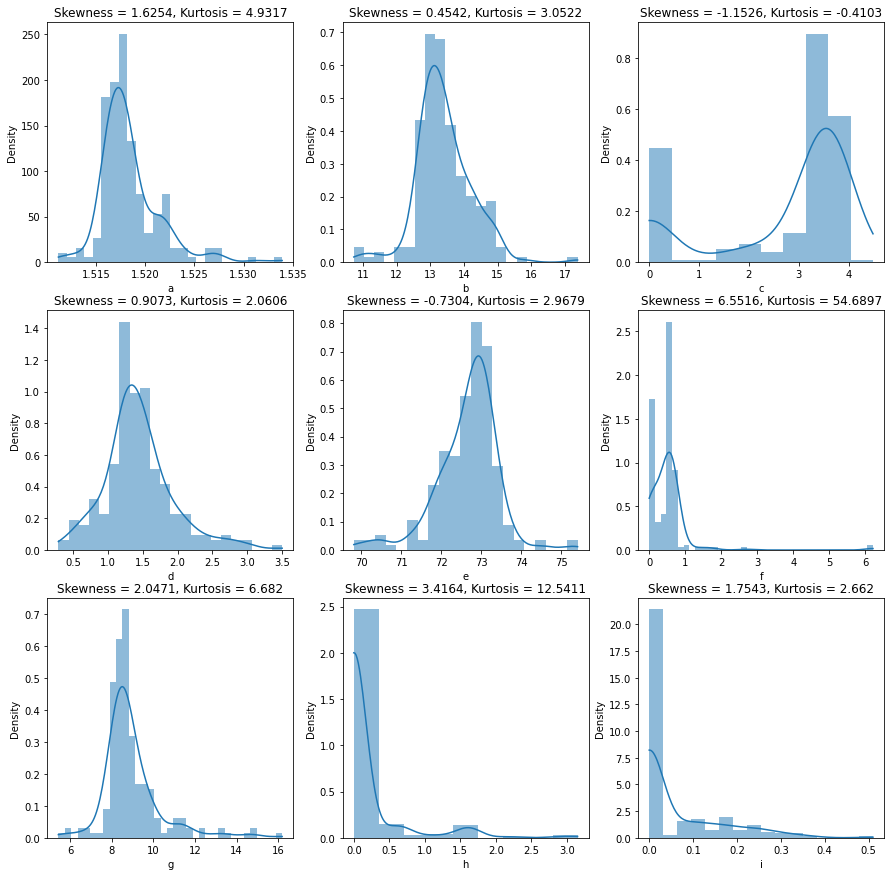

In [54]:
# Determine Skewness & Kurtosis
kurtosis = list(df.kurt().round(4))
skewness = list(df.skew().round(4))
f,axes = plt.subplots(3,3,figsize=(15, 15))

for ax,feature,i,j in zip(axes.flat,df.columns,skewness,kurtosis):
      sns.histplot(df[feature],ax=ax,kde=True,stat="density",linewidth=0).set(title="Skewness = " + str(i) + ", Kurtosis = " + str(j))


**Distribution Study**

Determine the distribution of the dataset. To reduce the process time, only five (5) distributions was chosen to be fitted, if the distribution need to be detremined in a more comprehensive manner, the "distributions" arguments can be removed and the fitter would checked through all the distributions available in the library.

* Ingredient a is best fitted with lognorm distribution.
* Ingredient b, d and g is best fitted with burr distribution.
* Ingredient c, e, f and h is best fitted with beta distribution.
* Ingredient i is best fitted with gamma distribution.

In [57]:
# Install PyPI
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 4.3 MB/s 
  Created wheel for fitter: filename=fitter-1.4.1-py3-none-any.whl size=25220 sha256=8c22e7d175e801f28ac287d9800c74340b6b60d3549f929c046ce721e9363686
  Stored in directory: /root/.cache/pip/wheels/38/ee/21/98ef5c3186a1f3e8747aa54cf9610fda8876ea82e06c670400
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=79b95de6024efd358c05b75cef579360d20da04f6f0042d6ac5ba991f41a4792
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [58]:
# Import Packages from PyPI
from fitter import Fitter, get_common_distributions, get_distributions

In [79]:
# Determine Data Distribution
for i in df.columns:
  array = df[i].values
  f = Fitter(array,distributions=["gamma","lognorm","beta","burr","norm"])
  f.fit()
  bestdist = f.get_best(method = "sumsquare_error")
  print("Ingredient "+ str(i))
  print("")
  print(pd.DataFrame.from_dict(bestdist))
  print("")

Ingredient a

        lognorm
loc    1.506235
s      0.232555
scale  0.011798

Ingredient b

            burr
c      30.003315
d       1.176173
loc    -0.090898
scale  13.351216

Ingredient c

               beta
a      2.193377e-01
b      3.539124e-01
loc   -1.369394e-28
scale  4.716426e+00

Ingredient d

           burr
c      7.888010
d      0.789119
loc   -0.458367
scale  1.935308

Ingredient e

               beta
a      6.651435e+06
b      6.456317e+01
loc   -6.365633e+05
scale  6.366421e+05

Ingredient f

               beta
a      7.767280e-01
b      1.666977e+02
loc   -2.819176e-26
scale  8.042567e+01

Ingredient g

           burr
c      8.392561
d      1.312127
loc    3.404568
scale  5.097977

Ingredient h

               beta
a      5.145302e-01
b      1.622465e+02
loc   -2.341667e-29
scale  1.975895e+01

Ingredient i

              gamma
a      1.073447e-01
loc   -4.616867e-31
scale  3.854752e-02



**Correlation Analysis**

The correlation between ingredients are determined. The correlation matrix was transformed to absolute value (all positive) for better visualisation.
* Ingredient a and g are highly correlated. 
* There are no correlation between ingredient:
  * a and h
  * c and f
  * d and e
  * f and i


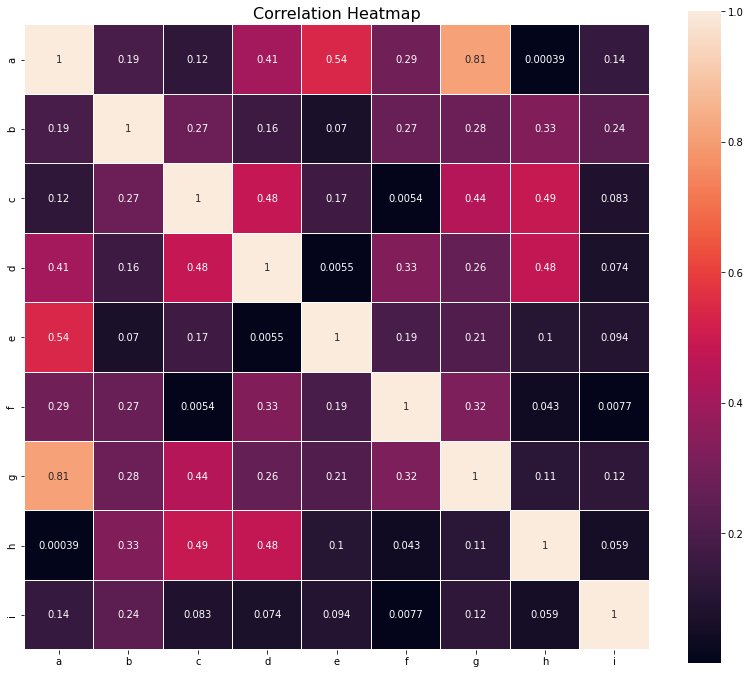

In [56]:
# Correlation Heatmap
correlation = abs(df.corr())
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation Heatmap', y = 1, size = 16)
sns.heatmap(correlation, vmax = 1.0, linewidths = 0.01, square = True, annot = True, linecolor = "white")

**ANOVA Analysis**

ANOVA anlaysis is concluded to be not applicable as the indepentdent variable in the dataset is not specified (unknown).

**Clustering**

Clustering Method: K-Means

Reasons: For the sake of simplicity

In [80]:
# Import Packages
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

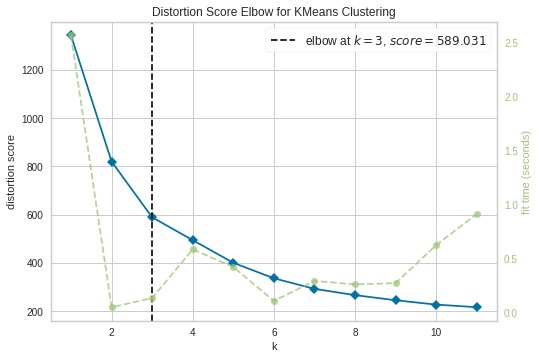

In [81]:
# Determine K-Values through Elbow Method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df)
visualizer.show()

From the Elbow method above, its shows that there are 3 clusters in the datasets. Hence, 3 sets of formulation.

In [97]:
# Perform Clustering
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

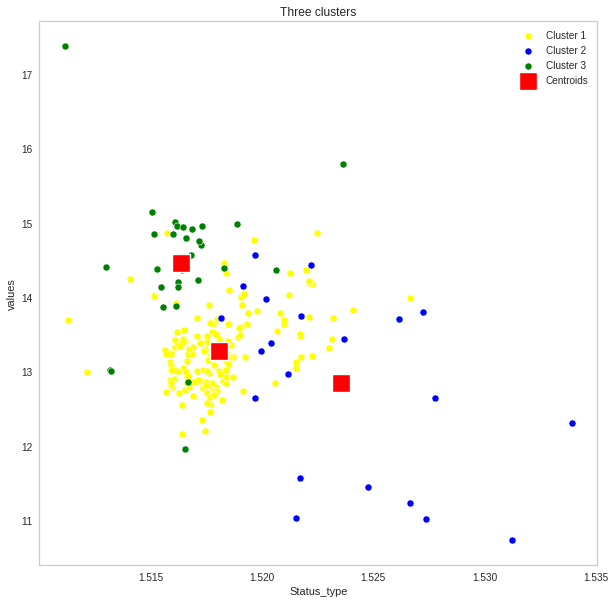

In [99]:
# Visualization
df = np.array(df)

plt.figure(figsize=(10,10))

sns.scatterplot(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', label = 'Centroids',s=300,marker=',')

plt.grid(False)
plt.title('Three clusters')
plt.xlabel('Status_type')
plt.ylabel('values')
plt.legend()
plt.show()